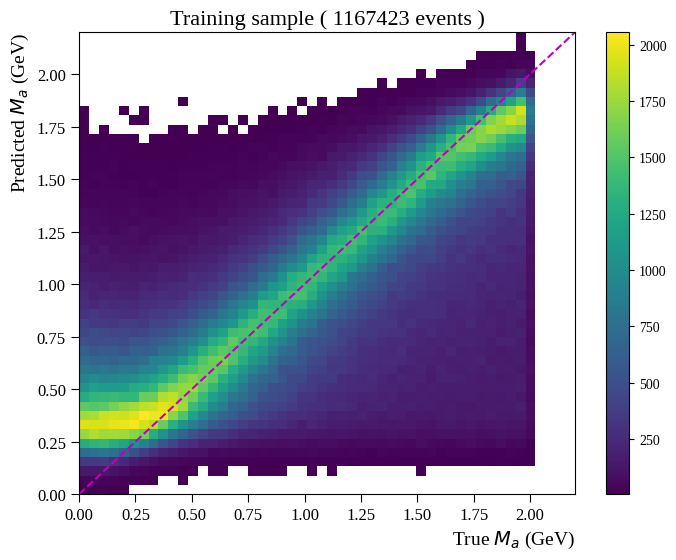

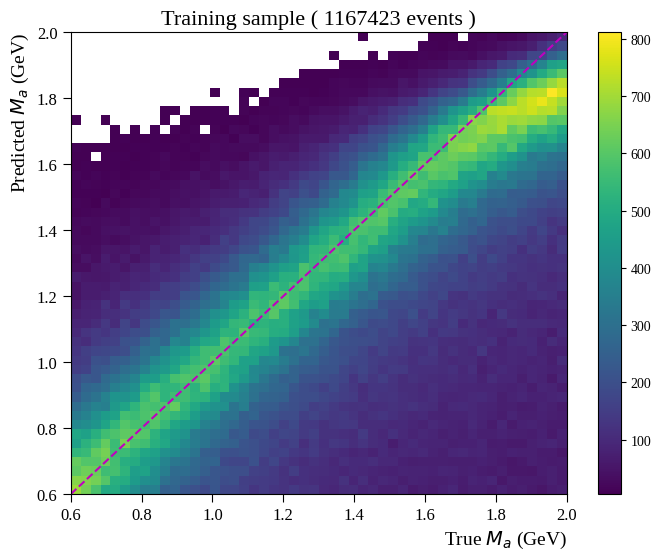

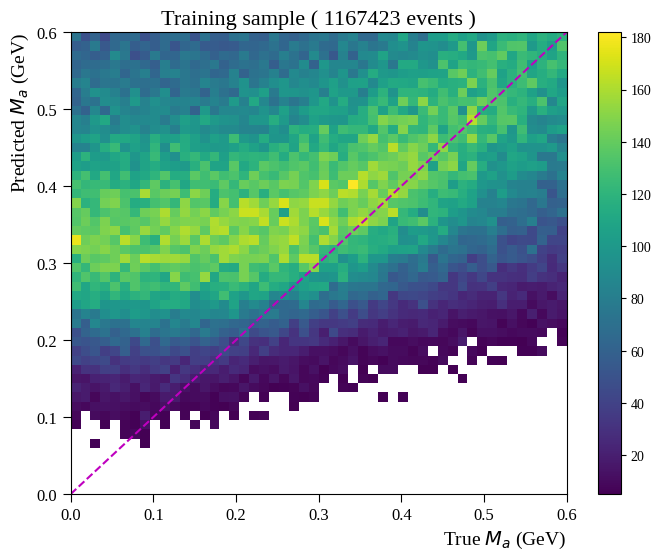

'\ns1 = np.load("summaries_100epoch.npz")\ntloss1=s1[\'train_loss\']\nvloss1=s1[\'valid_loss\']\nepoch1=s1[\'epoch\']\ns2=np.load("summaries_100to200epoch.npz")\ntloss2=s2[\'train_loss\']\nvloss2=s2[\'valid_loss\']\nepoch2=s2[\'epoch\']\nepoch2+=100\ntloss = np.concatenate((tloss1,tloss2),axis=0)\nvloss = np.concatenate((vloss1,vloss2),axis=0)\nepoch = np.concatenate((epoch1,epoch2),axis=0)\n\nplt.plot(epoch,tloss,\'-\',label="Training Loss")\nplt.plot(epoch,vloss,\'-\',label="Validation Loss")\nx,y = np.argmin(vloss),np.min(vloss)\nplt.axhline(y, color=\'r\', linestyle=\'--\',label=\'Best model\nMin Loss: \'+str(y)+\', Epoch: \'+str(x))\nplt.axvline(x, color=\'r\', linestyle=\'--\')\nplt.xlabel("Epoch",fontsize=14,loc=\'right\')\nplt.ylabel("Loss",fontsize=14,loc=\'top\')\nplt.tick_params(axis=\'x\', which=\'major\', labelsize=12, length=6)  # Increase x-axis major tick size to 12\nplt.tick_params(axis=\'y\', which=\'major\', labelsize=12, length=6)  # Increase y-axis major tick size 

In [36]:
import sys
sys.path.append('/home/somanko/root/root/lib')
import numpy as np
import pickle
import awkward as ak
import matplotlib.pyplot as plt
import math
import torch
import matplotlib
import ROOT
import uproot
import matplotlib.cm as cm

plt.rcParams['text.usetex'] = False

#matplotlib.use('pgf')
#matplotlib.rcParams['pgf.texsystem'] = 'pdflatex'
plt.rcParams['font.family'] = 'serif'  # Use a serif font like Times New Roman
plt.rcParams['font.serif'] = 'Liberation serif'
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

pred = np.array(np.load("pred.pickle",allow_pickle=True)).flatten()
true = np.array(np.load("trueE_target.pickle",allow_pickle=True)).flatten()
file=open("all_trainidx.pickle",'rb')
tidx=np.array(pickle.load(file))
file=open("all_valididx.pickle",'rb')
vidx=np.array(pickle.load(file))

#print(pho_r9)
predv=pred[vidx]
predt=pred[tidx]
truev=true[vidx]
truet=true[tidx]
#t1 = np.logical_and(true>=0.1, true<=0.2)
#T= true[t1]
#print(len(T))
predt=(predt-0.1)*2/1.9
predv=(predv-0.1)*2/1.9
truet=(truet-0.1)*2/1.9
truev=(truev-0.1)*2/1.9
#nt=np.random.normal(0, 0.02, predt.shape)
#nv=np.random.normal(0, 0.02, predv.shape)
#predt=predt+nt
#predv=predv+nv


x = np.linspace(0.6,2.2,500)
y = x
x1=np.linspace(0,0.6,500)
y1=x1
x0=np.linspace(0,2.2,500)
y0=x0

plt.hist2d(np.array(truet),np.array(predt),bins=50,range=[[0,2.2],[0,2.2]],cmin=5) 
plt.plot(x0,y0,'m--')
plt.colorbar()
plt.title("Training sample ( " + str(int(1.4*len(predt))) + " events )",fontsize=16)
plt.ylabel(f'Predicted $M_a$ (GeV)',fontsize=14,loc='top')
plt.xlabel(f'True $M_a$ (GeV)',fontsize=14,loc='right')
plt.tick_params(axis='x', which='major', labelsize=12, length=6)  # Increase x-axis major tick size to 12
plt.tick_params(axis='y', which='major', labelsize=12, length=6)  # Increase y-axis major tick size to 12
plt.savefig("0001_predvstrue_train.png",bbox_inches='tight')
plt.savefig("0001_predvstrue_train.pdf",bbox_inches='tight')
plt.show()

plt.plot(x,y,'m--')
plt.hist2d(np.array(truet),np.array(predt),bins=50,range=[[0.6,2],[0.6,2]],cmin=5) 
plt.colorbar()
plt.title("Training sample ( " + str(int(1.4*len(predt))) + " events )",fontsize=16)
plt.ylabel(f'Predicted $M_a$ (GeV)',fontsize=14,loc='top')
plt.xlabel(f'True $M_a$ (GeV)',fontsize=14,loc='right')
plt.tick_params(axis='x', which='major', labelsize=12, length=6)  # Increase x-axis major tick size to 12
plt.tick_params(axis='y', which='major', labelsize=12, length=6)  # Increase y-axis major tick size to 12
plt.savefig("0002_predvstrue_train.png",bbox_inches='tight')
plt.savefig("0002_predvstrue_train.pdf",bbox_inches='tight')
plt.show()

plt.hist2d(np.array(truet),np.array(predt),bins=50,range=[[0,0.6],[0,0.6]],cmin=5) 
plt.plot(x1,y1,'m--')
plt.colorbar()
plt.title("Training sample ( " + str(int(1.4*len(predt))) + " events )",fontsize=16)
plt.ylabel(f'Predicted $M_a$ (GeV)',fontsize=14,loc='top')
plt.xlabel(f'True $M_a$ (GeV)',fontsize=14,loc='right')
plt.tick_params(axis='x', which='major', labelsize=12, length=6)  # Increase x-axis major tick size to 12
plt.tick_params(axis='y', which='major', labelsize=12, length=6)  # Increase y-axis major tick size to 12
plt.savefig("0003_predvstrue_train_0_0p6.png",bbox_inches='tight')
plt.savefig("0003_predvstrue_train_0_0p6.pdf",bbox_inches='tight')
plt.show()

'''
s1 = np.load("summaries_100epoch.npz")
tloss1=s1['train_loss']
vloss1=s1['valid_loss']
epoch1=s1['epoch']
s2=np.load("summaries_100to200epoch.npz")
tloss2=s2['train_loss']
vloss2=s2['valid_loss']
epoch2=s2['epoch']
epoch2+=100
tloss = np.concatenate((tloss1,tloss2),axis=0)
vloss = np.concatenate((vloss1,vloss2),axis=0)
epoch = np.concatenate((epoch1,epoch2),axis=0)

plt.plot(epoch,tloss,'-',label="Training Loss")
plt.plot(epoch,vloss,'-',label="Validation Loss")
x,y = np.argmin(vloss),np.min(vloss)
plt.axhline(y, color='r', linestyle='--',label='Best model\nMin Loss: '+str(y)+', Epoch: '+str(x))
plt.axvline(x, color='r', linestyle='--')
plt.xlabel("Epoch",fontsize=14,loc='right')
plt.ylabel("Loss",fontsize=14,loc='top')
plt.tick_params(axis='x', which='major', labelsize=12, length=6)  # Increase x-axis major tick size to 12
plt.tick_params(axis='y', which='major', labelsize=12, length=6)  # Increase y-axis major tick size to 12
plt.legend(fontsize=12)
plt.savefig("0007_lossvsepoch_sc_eta.png",bbox_inches='tight')
plt.savefig("0007_lossvsepoch_sc_eta.pdf",bbox_inches='tight')
plt.show()
'''


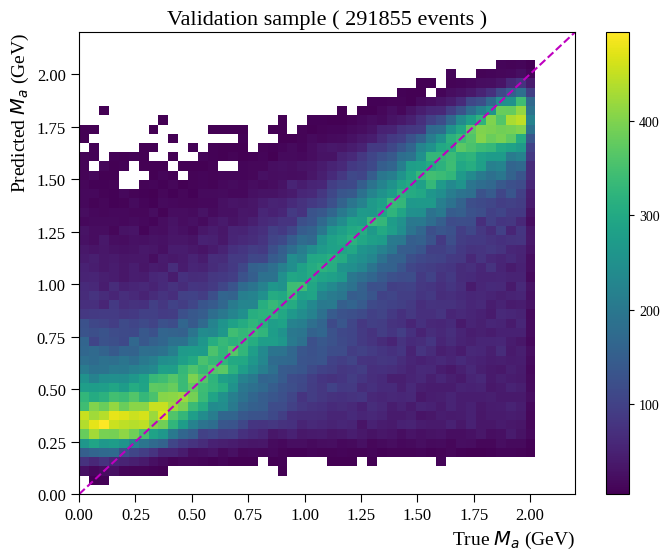

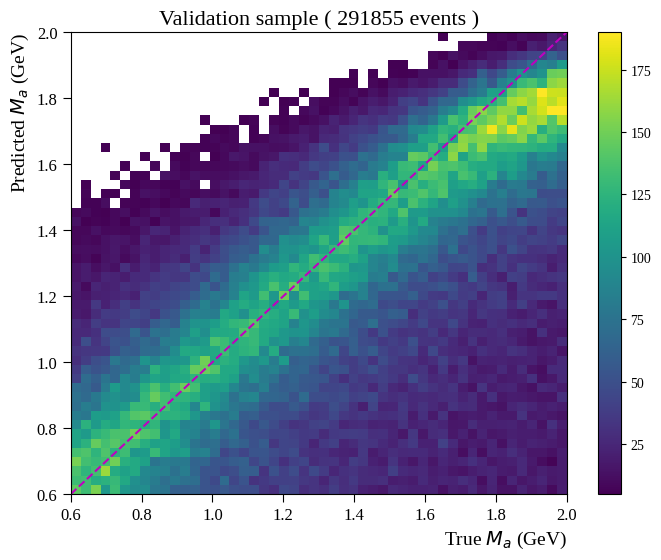

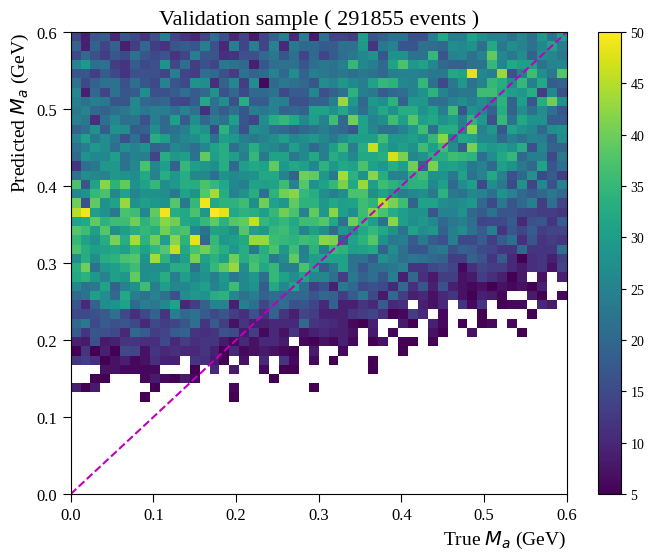

In [37]:
plt.hist2d(np.array(truev),np.array(predv),bins=50,range=[[0,2.2],[0,2.2]],cmin=5) 
plt.plot(x0,y0,'m--')
plt.colorbar()
plt.title("Validation sample ( " + str(int(1.4*len(predv))) + " events )",fontsize=16)
plt.ylabel(f'Predicted $M_a$ (GeV)',fontsize=14,loc='top')
plt.xlabel(f'True $M_a$ (GeV)',fontsize=14,loc='right')
plt.tick_params(axis='x', which='major', labelsize=12, length=6)  # Increase x-axis major tick size to 12
plt.tick_params(axis='y', which='major', labelsize=12, length=6)  # Increase y-axis major tick size to 12
plt.savefig("0004_predvstrue_valid.png",bbox_inches='tight')
plt.savefig("0004_predvstrue_valid.pdf",bbox_inches='tight')
plt.show()

plt.plot(x,y,'m--')
plt.hist2d(np.array(truev),np.array(predv),bins=50,range=[[0.6,2],[0.6,2]],cmin=5) 
plt.colorbar()
plt.title("Validation sample ( " + str(int(1.4*len(predv))) + " events )",fontsize=16)
plt.ylabel(f'Predicted $M_a$ (GeV)',fontsize=14,loc='top')
plt.xlabel(f'True $M_a$ (GeV)',fontsize=14,loc='right')
plt.tick_params(axis='x', which='major', labelsize=12, length=6)  # Increase x-axis major tick size to 12
plt.tick_params(axis='y', which='major', labelsize=12, length=6)  # Increase y-axis major tick size to 12
plt.savefig("0005_predvstrue_valid_0p6_2.png",bbox_inches='tight')
plt.savefig("0005_predvstrue_valid_0p6_2.pdf",bbox_inches='tight')
plt.show()

plt.hist2d(np.array(truev),np.array(predv),bins=50,range=[[0,0.6],[0,0.6]],cmin=5) 
plt.plot(x1,y1,'m--')
plt.colorbar()
plt.title("Validation sample ( " + str(int(1.4*len(predv))) + " events )",fontsize=16)
plt.ylabel(f'Predicted $M_a$ (GeV)',fontsize=14,loc='top')
plt.xlabel(f'True $M_a$ (GeV)',fontsize=14,loc='right')
plt.tick_params(axis='x', which='major', labelsize=12, length=6)  # Increase x-axis major tick size to 12
plt.tick_params(axis='y', which='major', labelsize=12, length=6)  # Increase y-axis major tick size to 12
plt.savefig("0006_predvstrue_valid_0_0p6.png",bbox_inches='tight')
plt.savefig("0006_predvstrue_valid_0_0p6.pdf",bbox_inches='tight')
plt.show()


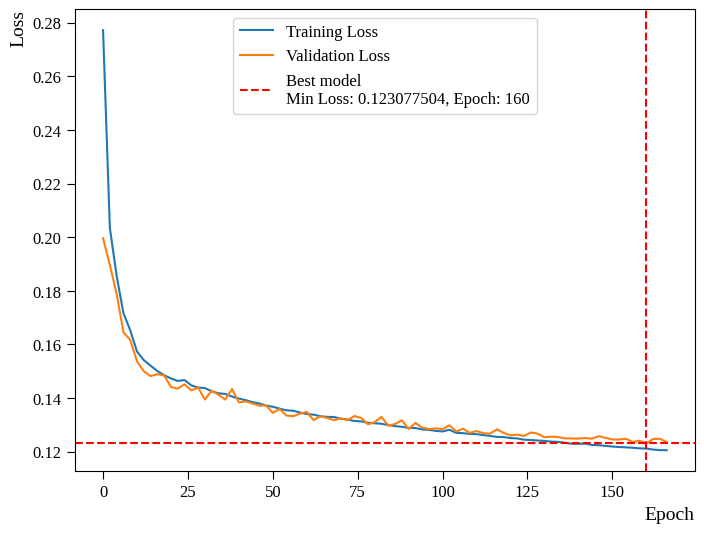

In [47]:
s = np.load("summaries.npz")
tloss=s['train_loss']
vloss=s['valid_loss']
epoch=s['epoch']

tloss=tloss
vloss=vloss
epoch=epoch
plt.figure(figsize=[8,6])
plt.plot(epoch,tloss,'-',label="Training Loss")
plt.plot(epoch,vloss,'-',label="Validation Loss")
x,y = np.argmin(vloss),np.min(vloss)
plt.axhline(y, color='r', linestyle='--',label='Best model\nMin Loss: '+str(y)+', Epoch: '+str(x))
plt.axvline(x, color='r', linestyle='--')
plt.xlabel("Epoch",fontsize=14,loc='right')
plt.ylabel("Loss",fontsize=14,loc='top')
plt.tick_params(axis='x', which='both', labelsize=12, length=6)  # Increase x-axis major tick size to 12
plt.tick_params(axis='y', which='both', labelsize=12, length=6)  # Increase y-axis major tick size to 12
plt.legend(fontsize=12)
plt.savefig("0007_lossvsepoch_sc_eta.png",bbox_inches='tight')
plt.savefig("0007_lossvsepoch_sc_eta.pdf",bbox_inches='tight')
plt.show()


In [40]:
def iterative_gaussian_fit(data_name,data, max_iterations=12, tolerance=1e-3, bins=100, range_min=None, range_max=None):
    """
    Perform iterative Gaussian fitting around the peak of a distribution.

    Parameters:
        data (array-like): Input data for the histogram.
        max_iterations (int): Maximum number of iterations for fitting.
        tolerance (float): Convergence criterion for mean and sigma changes.
        bins (int): Number of bins for the histogram.
        range_min (float): Minimum range for the histogram (default: min of data).
        range_max (float): Maximum range for the histogram (default: max of data).

    Returns:
        tuple: (mean, sigma, gauss_fit, canvas, hist)
    """
    # Set histogram range
    if range_min is None:
        range_min = min(data)
    if range_max is None:
        range_max = max(data)

    # Create a histogram from the data
    hist = ROOT.TH1F("hist", "Gaussian Fit", bins, range_min, range_max)
    for val in data:
        hist.Fill(val)

    # Find initial peak and std deviation estimate
    max_bin = hist.GetMaximumBin()
    bin_center = hist.GetBinCenter(max_bin)
    std_dev = np.std(data)

    prev_mean = None
    prev_sigma = None

    for iteration in range(max_iterations):
        # Define the fit range around the current peak
        fit_min = bin_center - std_dev
        fit_max = bin_center + std_dev

        # Create a Gaussian fit function
        gauss_fit = ROOT.TF1(f"gauss_fit_{iteration}", "gaus", fit_min, fit_max)

        # Perform the fit only within the specified range
        fit_result = hist.Fit(gauss_fit, "RQ")  # Quiet fit with range

        # Extract fit parameters
        mean = gauss_fit.GetParameter(1)  # Mean of the Gaussian
        sigma = gauss_fit.GetParameter(2)  # Standard deviation of the Gaussian

        # Check for convergence
        if prev_mean is not None and prev_sigma is not None:
            if abs((mean - prev_mean)/prev_mean) < tolerance and abs((sigma - prev_sigma)/prev_sigma) < tolerance:
                print(f"Fit converged after {iteration + 1} iterations.")
                break

        # Update range for the next iteration
        bin_center = mean
        std_dev = sigma

        prev_mean = mean
        prev_sigma = sigma

    else:
        print(f"Fit did not converge after {max_iterations} iterations.")

    # Draw the final fit
    
    ROOT.gStyle.SetOptFit(0)
    ROOT.gStyle.SetOptStat(0)
    canvas = ROOT.TCanvas("canvas", "Gaussian Fit", 800, 600)
    hist.SetXTitle("Predicted M_{a} (GeV)")
    hist.SetYTitle("Frequency")
    hist.Draw("HIST")
    gauss_fit.Draw("SAME")
    latex = ROOT.TLatex()
    latex.SetNDC()  # Use normalized device coordinates
    latex.SetTextSize(0.03)
    latex.DrawLatex(0.15, 0.85, f"#mu = {mean:.3f}")
    latex.DrawLatex(0.15, 0.80, f"#sigma = {sigma:.3f}")
    latex.Draw()
    canvas.Modified()
    #canvas.Update()
    canvas.Draw()
    canvas.SaveAs(f"{data_name}_fit.png")
    canvas.SaveAs(f"{data_name}_fit.pdf")    

    return mean, sigma, canvas, gauss_fit, hist


In [41]:
def plot_root_histogram_with_hist(hist, title="ROOT Histogram in Matplotlib", save_as=None):
    """
    Plots a ROOT histogram using Matplotlib's plt.hist.

    Parameters:
        hist (ROOT.TH1): The ROOT histogram to plot.
        title (str): Title of the plot.
        save_as (str or None): File path to save the plot (optional).
    """
    # Get bin edges and contents from the ROOT histogram
    nbins = hist.GetNbinsX()
    bin_edges = [hist.GetBinLowEdge(i) for i in range(1, nbins + 2)]
    bin_contents = [hist.GetBinContent(i) for i in range(1, nbins + 1)]

    # Convert to NumPy arrays
    bin_edges = np.array(bin_edges)
    bin_contents = np.array(bin_contents)

    # Use plt.hist to recreate the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(
        bin_edges[:-1], bins=bin_edges, weights=bin_contents, histtype="step", color="blue", label="Histogram"
    )

    # Customize the plot
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.legend()
    plt.grid(True)

    # Save or show the plot
    if save_as:
        plt.savefig(save_as, bbox_inches="tight")
    plt.show()
def iterative_gaussian_fit(data_name,data, max_iterations=20, tolerance=1e-3, bins=100, range_min=None, range_max=None):
    """
    Perform iterative Gaussian fitting around the peak of a distribution.

    Parameters:
        data (array-like): Input data for the histogram.
        max_iterations (int): Maximum number of iterations for fitting.
        tolerance (float): Convergence criterion for mean and sigma changes.
        bins (int): Number of bins for the histogram.
        range_min (float): Minimum range for the histogram (default: min of data).
        range_max (float): Maximum range for the histogram (default: max of data).

    Returns:
        tuple: (mean, sigma, gauss_fit, canvas, hist)
    """
    # Set histogram range
    if range_min is None:
        range_min = min(data)
    if range_max is None:
        range_max = max(data)

    # Create a histogram from the data
    hist = ROOT.TH1F("hist", "Gaussian Fit", bins, range_min, range_max)
    for val in data:
        hist.Fill(val)

    hist.Scale(1/hist.Integral())
    # Find initial peak and std deviation estimate
    max_bin = hist.GetMaximumBin()
    bin_center = hist.GetBinCenter(max_bin)
    std_dev = np.std(data)

    prev_mean = None
    prev_sigma = None

    for iteration in range(max_iterations):
        # Define the fit range around the current peak
        fit_min = bin_center - std_dev
        fit_max = bin_center + std_dev

        # Create a Gaussian fit function
        gauss_fit = ROOT.TF1(f"gauss_fit_{iteration}", "gaus", fit_min, fit_max)

        # Perform the fit only within the specified range
        fit_result = hist.Fit(gauss_fit, "RQ")  # Quiet fit with range

        # Extract fit parameters
        mean = gauss_fit.GetParameter(1)  # Mean of the Gaussian
        sigma = gauss_fit.GetParameter(2)  # Standard deviation of the Gaussian

        # Check for convergence
        if prev_mean is not None and prev_sigma is not None:
            if abs((mean - prev_mean)/prev_mean) < tolerance and abs((sigma - prev_sigma)/prev_sigma) < tolerance:
                print(f"Fit converged after {iteration + 1} iterations.")
                break

        # Update range for the next iteration
        bin_center = mean
        std_dev = sigma

        prev_mean = mean
        prev_sigma = sigma

    else:
        print(f"Fit did not converge after {max_iterations} iterations.")

    # Draw the final fit
    
    ROOT.gStyle.SetOptFit(0)
    ROOT.gStyle.SetOptStat(0)
    canvas = ROOT.TCanvas("canvas", "Gaussian Fit", 800, 600)
    hist.SetXTitle("Predicted M_{a} (GeV)")
    hist.SetYTitle("Frequency")
    hist.Draw("HIST")
    gauss_fit.Draw("SAME")
    latex = ROOT.TLatex()
    latex.SetNDC()  # Use normalized device coordinates
    latex.SetTextSize(0.03)
    latex.DrawLatex(0.15, 0.85, f"#mu = {mean:.3f}")
    latex.DrawLatex(0.15, 0.80, f"#sigma = {sigma:.3f}")
    latex.Draw()
    canvas.Modified()
    #canvas.Update()
    canvas.Draw()
    canvas.SaveAs(f"{data_name}_fit.png")
    canvas.SaveAs(f"{data_name}_fit.pdf")    

    return mean, sigma, canvas, gauss_fit, hist
def get_hist_and_fit(hist,fit,label,color,savename=None):
    nbins = hist.GetNbinsX()
    bin_edges = np.array([hist.GetBinLowEdge(i+1) for i in range(nbins+1)])
    bin_contents = np.array([hist.GetBinContent(i+1) for i in range(1, nbins+1)])
    bin_errors = np.array([hist.GetBinError(i+1) for i in range(1, nbins+1)])
    
    
    # Plot the histogram
    plt.step(bin_edges[:-1], bin_contents, where='post', color=color[0],label=label)
    #Plot fit
    x_fit = np.linspace(hist.GetBinLowEdge(1), hist.GetBinLowEdge(nbins+1), 1000)
    y_fit = np.array([fit.Eval(x) for x in x_fit])
    fit_label=label+" fit"
    mean=fit.GetParameter(1)
    sigma=fit.GetParameter(2)
    fit_label = f"{fit_label} \n $\mu$ = {mean:.3f}, $\sigma $ = {sigma:.3f}"
    plt.plot(x_fit, y_fit, label=fit_label, color=color[1], linestyle='--')
    if savename:
        plt.savefig(savename+".png",bbox_inches='tight')
        plt.savefig(savename+".pdf",bbox_inches='tight')     
def get_hist_fit_array(trueM,hist,fit,label,color,savename):
    plt.figure(figsize=(8,6))
    for index,val in enumerate(hist):
        get_hist_and_fit(hist[index],fit[index],label[index],color[index])
    plt.axvline(trueM, color='black',label='True $M_{a}$')
    plt.axvline(trueM-0.02, color='black',linestyle='--')
    plt.axvline(trueM+0.02, color='black',linestyle='--')
    plt.xlabel("Predicted $M_{a}$ (GeV)")
    plt.ylabel("Normalized frequency")
    plt.title(f"{trueM-0.02 :.2f} < $M_a$ < {trueM+0.02:.2f} GeV")
    plt.legend()
    plt.savefig(savename+".png",bbox_inches='tight')
    plt.savefig(savename+".pdf",bbox_inches='tight')
    plt.close()
resp_t=[]
resp_v=[]
reso_t=[]
reso_v=[]
trueM=[]
for x in np.arange(0.1,2,0.1):
    cond_t = (truet>x-0.02) & (truet<x+0.02)
    cond_v = (truev>x-0.02) & (truev<x+0.02)
    p1=predt[cond_t]
    p2=predv[cond_v]
    mu1,sigma1,_,gfit1,hist1=iterative_gaussian_fit(f"MA_{x:.2f}_train",p1)
    mu2,sigma2,_,gfit2,hist2=iterative_gaussian_fit(f"MA_{x:.2f}_valid",p2)
    reso_t.append(mu1/x)
    reso_v.append(mu2/x)
    resp_t.append(sigma1/mu1)
    resp_v.append(sigma2/mu2)
    trueM.append(x)
    get_hist_fit_array(x,[hist1,hist2],[gfit1,gfit2],["Training","Validation"],[['blue','limegreen'],['red','orange']],f"MA_{x:.2f}_allfits")
    

Fit converged after 4 iterations.
Fit did not converge after 20 iterations.
Fit converged after 6 iterations.
Fit did not converge after 20 iterations.
Fit converged after 6 iterations.
Fit did not converge after 20 iterations.
Fit did not converge after 20 iterations.
Fit converged after 5 iterations.
Fit converged after 4 iterations.
Fit converged after 4 iterations.
Fit converged after 3 iterations.
Fit converged after 4 iterations.
Fit converged after 4 iterations.
Fit converged after 4 iterations.
Fit converged after 4 iterations.
Fit converged after 5 iterations.
Fit converged after 4 iterations.
Fit converged after 3 iterations.
Fit converged after 4 iterations.
Fit converged after 5 iterations.
Fit converged after 4 iterations.
Fit did not converge after 20 iterations.
Fit converged after 5 iterations.
Fit converged after 3 iterations.
Fit converged after 5 iterations.
Fit did not converge after 20 iterations.
Fit converged after 5 iterations.
Fit converged after 5 iterations.


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file MA_0.10_train_fit.png has been created
Info in <TCanvas::Print>: pdf file MA_0.10_train_fit.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file MA_0.10_valid_fit.png has been created
Info in <TCanvas::Print>: pdf file MA_0.10_valid_fit.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file MA_0.20_train_fit.png has been created
Info in <TCanvas::Print>: pdf file MA_0.20_train_fit.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warnin

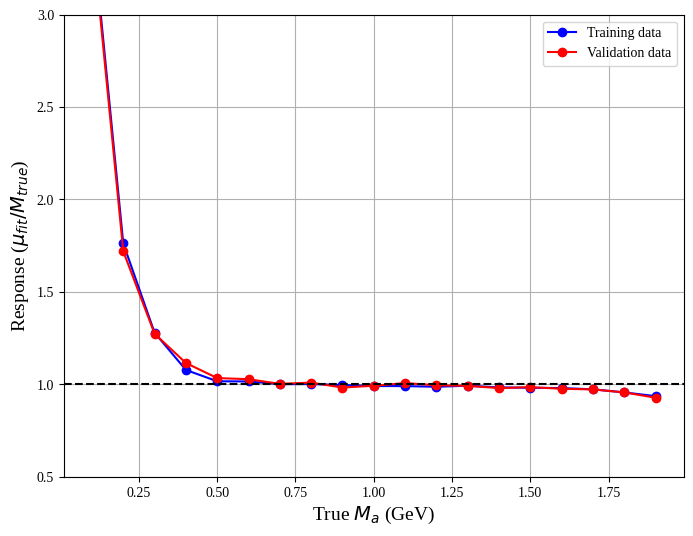

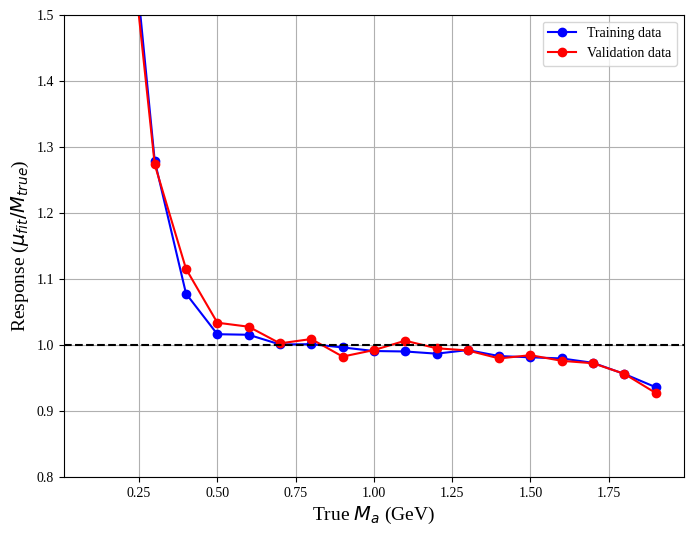

In [42]:
plt.figure(figsize=(8,6))
plt.plot(trueM,reso_t,color='b',marker='o',label='Training data')
plt.plot(trueM,reso_v,color='r',marker='o',label='Validation data')
plt.axhline(y=1,color='black',linestyle='--')
plt.ylabel("Response ($\mu_{fit}/M_{true}$)")
plt.xlabel("True $M_{a}$ (GeV)")
plt.legend()
plt.ylim(0.5,3)
plt.grid(True)
plt.savefig("Mu_fit_by_M_true.png",bbox_inches='tight')
plt.savefig("Mu_fit_by_M_true.pdf",bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=(8,6))
plt.plot(trueM,reso_t,color='b',marker='o',label='Training data')
plt.plot(trueM,reso_v,color='r',marker='o',label='Validation data')
plt.axhline(y=1,color='black',linestyle='--')
plt.ylabel("Response ($\mu_{fit}/M_{true}$)")
plt.xlabel("True $M_{a}$ (GeV)")
plt.legend()
plt.grid(True)
plt.ylim(0.8,1.5)
plt.savefig("Mu_fit_by_M_true_zoom.png",bbox_inches='tight')
plt.savefig("Mu_fit_by_M_true_zoom.pdf",bbox_inches='tight')
plt.show()

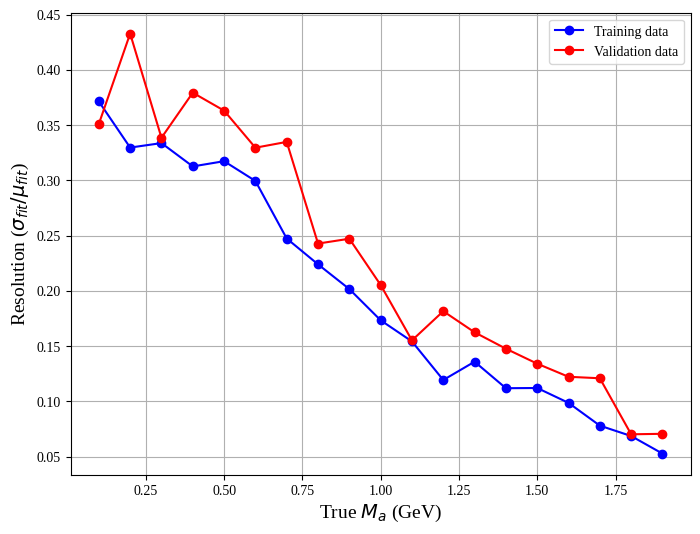

In [43]:
plt.plot(trueM,resp_t,color='b',marker='o',label='Training data')
plt.plot(trueM,resp_v,color='r',marker='o',label='Validation data')
#plt.axhline(y=1,color='black',linestyle='--')
plt.ylabel("Resolution ($\sigma_{fit}/\mu_{fit}$)")
plt.xlabel("True $M_{a}$ (GeV)")
plt.legend()
plt.grid(True)
plt.savefig("sigma_by_mu.png",bbox_inches='tight')
plt.savefig("sigma_by_mu.pdf",bbox_inches='tight')

In [44]:
x=0.84
cond_t = (truet>x-0.02) & (truet<x+0.02)
cond_v = (truev>x-0.02) & (truev<x+0.02)
p1=predt[cond_t]
p2=predv[cond_v]
mu1,sigma1,_,gfit1,hist1=iterative_gaussian_fit(f"MA_{x:.2f}_train",p1)
mu2,sigma2,_,gfit2,hist2=iterative_gaussian_fit(f"MA_{x:.2f}_valid",p2)
get_hist_fit_array(x,[hist1,hist2],[gfit1,gfit2],["Training","Validation"],[['blue','limegreen'],['red','orange']],f"MA_{x:.2f}_allfits")

Fit converged after 4 iterations.
Fit did not converge after 20 iterations.


Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file MA_0.84_train_fit.png has been created
Info in <TCanvas::Print>: pdf file MA_0.84_train_fit.pdf has been created
Warning in <TROOT::Append>: Replacing existing TH1: hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file MA_0.84_valid_fit.png has been created
Info in <TCanvas::Print>: pdf file MA_0.84_valid_fit.pdf has been created
